In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
titanic = pd.read_csv("train.csv")
display(titanic.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Label Encoding

Sex değişkenini Mean encoding yaparak encode ediniz. Her kategori için Survived değişkeninin ortalamasını kategori adı ile değiştirebilirsiniz. 

IPUCU: pandas groupby ve map fonksiyonlarını kullanabilirsiniz.

In [95]:
means = titanic.groupby('Sex')['Survived'].mean()
display(means)
titanic['Sex']=titanic['Sex'].map(means)
display(titanic)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0.188908,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.742038,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0.742038,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.742038,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0.188908,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0.188908,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0.188908,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0.188908,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0.742038,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0.742038,14.0,1,0,237736,30.0708,NaN,C


Bindikleri Yer (Embarked) değişkenini sklearn OneHotEncoder objesini kullanarak encode edin.<br>

In [130]:
df_onehot=titanic.copy()
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
df_onehot["Embarked"].fillna(df_onehot["Embarked"].mode()[0],inplace=True)
encoded_features=enc.fit_transform(df_onehot[['Embarked']]).astype(np.uint8)
pd.DataFrame(encoded_features)
enc.categories_
categories = enc.categories_[0].tolist()
pd.DataFrame(encoded_features, columns=categories)
pd.DataFrame(OneHotEncoder(sparse=False).fit_transform(df_onehot[["Embarked"]]))

,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
5,0.0,1.0,0.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,1.0,0.0,0.0


Cabin değişkenini sklearn LabelEncoder veya OrdinalEncoder objesini kullanarak encode edin.

In [133]:
from sklearn.preprocessing import LabelEncoder
titanic_1 = titanic.copy()
titanic_1['Cabin']=titanic_1['Cabin'].astype(str)
enc = LabelEncoder()
titanic_1["Cabin"] =enc.fit_transform(titanic_1["Cabin"])
enc.classes_
enc_values, mapping = pd.factorize(titanic_1.Cabin)
titanic_1["cabin_enc"] = enc_values
print(mapping)
display(titanic_1)

Int64Index([147,  81,  55, 129, 145,  49, 111,  13,  63,  41,
            ...
             16,  37, 130,  68,  99, 119,   6,  70,  30,  60],
           dtype='int64', length=148)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_enc
0,1,0,3,"Braund, Mr. Owen Harris",0.188908,22.0,1,0,A/5 21171,7.2500,147,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.742038,38.0,1,0,PC 17599,71.2833,81,C,1
2,3,1,3,"Heikkinen, Miss. Laina",0.742038,26.0,0,0,STON/O2. 3101282,7.9250,147,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.742038,35.0,1,0,113803,53.1000,55,S,2
4,5,0,3,"Allen, Mr. William Henry",0.188908,35.0,0,0,373450,8.0500,147,S,0
5,6,0,3,"Moran, Mr. James",0.188908,NaN,0,0,330877,8.4583,147,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",0.188908,54.0,0,0,17463,51.8625,129,S,3
7,8,0,3,"Palsson, Master. Gosta Leonard",0.188908,2.0,3,1,349909,21.0750,147,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0.742038,27.0,0,2,347742,11.1333,147,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0.742038,14.0,1,0,237736,30.0708,147,C,0


# Outlier Handling

Fare değişkeni için boxplot çizdiriniz.

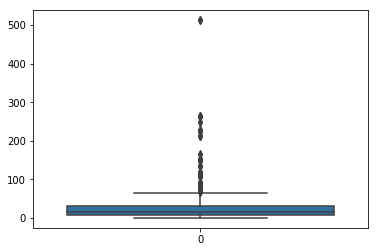

In [134]:
sns.boxplot(data=titanic.Fare)

Fare değişkeninedeki outlier değerleri Z-Score kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız. 

In [135]:
titanic_z=titanic.copy()
fare_mean = titanic_z.Fare.mean()
fare_std = titanic_z.Fare.std()
z_score = (titanic_z.Fare - fare_mean) / fare_std
display(z_score)
(z_score>3).sum(), (z_score<-3).sum()

0     -0.502163
1      0.786404
2     -0.488580
3      0.420494
4     -0.486064
5     -0.477848
6      0.395591
7     -0.223957
8     -0.424018
9     -0.042931
10    -0.311997
11    -0.113782
12    -0.486064
13    -0.018699
14    -0.490005
15    -0.326084
16    -0.061964
17    -0.386454
18    -0.285837
19    -0.502666
20    -0.124850
21    -0.386454
22    -0.486483
23     0.066322
24    -0.223957
25    -0.016435
26    -0.502666
27     4.644393
28    -0.489502
29    -0.489167
         ...   
861   -0.416639
862   -0.126274
863    0.751524
864   -0.386454
865   -0.386454
866   -0.369182
867    0.368089
868   -0.456886
869   -0.424018
870   -0.489167
871    0.409511
872   -0.547441
873   -0.466947
874   -0.165096
875   -0.502666
876   -0.449927
877   -0.489167
878   -0.489167
879    1.025369
880   -0.124850
881   -0.489167
882   -0.436426
883   -0.436762
884   -0.506188
885   -0.061964
886   -0.386454
887   -0.044356
888   -0.176164
889   -0.044356
890   -0.492101
Name: Fare, Length: 891,

(20, 0)

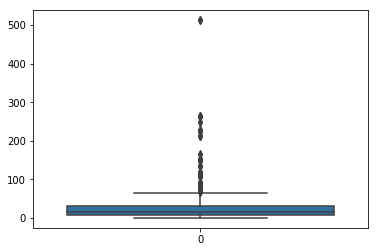

In [136]:
sns.boxplot(data=titanic_z.Fare)

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


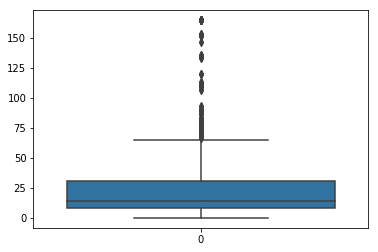

In [140]:
upper_replace_value = titanic_z[z_score<=3]['Fare'].max()
lower_replace_value = titanic_z[z_score>=-3]['Fare'].min()
titanic_z["Fare"][z_score>3] = upper_replace_value
titanic_z["Fare"][z_score<-3] = lower_replace_value
titanic_z["Fare"].min(), titanic_z["Fare"].max()
sns.boxplot(data=titanic_z.Fare)


Fare değişkeninedeki outlier değerleri IQR metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [150]:
titanic_i=titanic.copy()
q1 = titanic_i['Fare'].quantile(q=0.25)
q3 = titanic_i['Fare'].quantile(q=0.75)
iqr=q3-q1
from scipy import stats 
iqr = stats.iqr(titanic_2["Fare"]) 
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

lower_limit, upper_limit, eski

(-26.724, 65.6344, (891, 12))

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


116

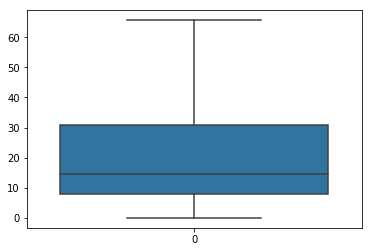

In [152]:
titanic_i["Fare"][titanic_i["Fare"] > upper_limit] = upper_limit
titanic_i["Fare"][titanic_i["Fare"] < lower_limit] = lower_limit
sns.boxplot(data=titanic_i.Fare)
len(titanic.Fare[(titanic.Fare > upper_limit) | (titanic.Fare < lower_limit)])


Fare değişkeninedeki outlier değerleri Hard-Edges metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [159]:
titanic_he=titanic.copy()
lower_limit = titanic_he['Fare'].quantile(q=0.01)
upper_limit = titanic_he['Fare'].quantile(q=0.99)
lower_limit, upper_limit
outlier = titanic_he[(titanic_he.Fare<lower_limit)|(titanic_he.Fare>=upper_limit)]
len(outlier)

9

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


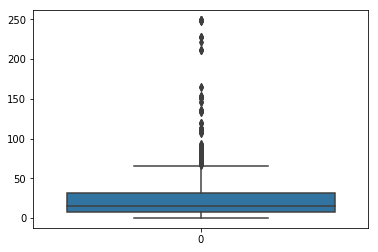

In [163]:
titanic_he["Fare"][titanic_he["Fare"]> upper_limit] = upper_limit
titanic_he["Fare"][titanic_he["Fare"] < lower_limit] = lower_limit
sns.boxplot(data=titanic_he.Fare)


Fare değişkeni için yukarıdaki 3 metodu kullanarak sınır değerler olarak bulduğunuz değerleri ve outlier sayılarını karşılaştırın. Bu değişken için hangisini kullanmak daha mantıklı olabilir?

In [164]:
print("en uygun Hard Edges yöntemidir çünkü yalnızca 9 outlier var, veriyi çok kaybetmiyoruz.")

en uygun Hard Edges yöntemidir çünkü yalnızca 9 outlier var, veriyi çok kaybetmiyoruz.
